In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
TOKEN = os.getenv('TOKEN')

print(f'Length of TOKEN: {len(TOKEN)} characters')

Length of TOKEN: 46 characters


In [2]:
import telebot
bot = telebot.TeleBot(TOKEN)

In [3]:
import pickle

with open('cache/message_object.pkl', 'rb') as f:
    message = pickle.load(f)
    print(type(message)) # print object type
    print(str(message)[:1000]) # print only the first 1000 characters of message content

<class 'telebot.types.Message'>
{'content_type': 'text', 'id': 204, 'message_id': 204, 'from_user': {'id': 727286868, 'is_bot': False, 'first_name': 'Algoritma', 'username': 'AlgoCapstone', 'last_name': None, 'language_code': 'en', 'can_join_groups': None, 'can_read_all_group_messages': None, 'supports_inline_queries': None}, 'date': 1622745226, 'chat': {'id': 727286868, 'type': 'private', 'title': None, 'username': 'AlgoCapstone', 'first_name': 'Algoritma', 'last_name': None, 'photo': None, 'bio': None, 'description': None, 'invite_link': None, 'pinned_message': None, 'permissions': None, 'slow_mode_delay': None, 'sticker_set_name': None, 'can_set_sticker_set': None, 'linked_chat_id': None, 'location': None}, 'forward_from': None, 'forward_from_chat': None, 'forward_from_message_id': None, 'forward_signature': None, 'forward_sender_name': None, 'forward_date': None, 'reply_to_message': None, 'edit_date': None, 'media_group_id': None, 'author_signature': None, 'text': '/help', 'entitie

In [4]:
from string import Template

# TO DO: subtitute text with static values
with open('template_text/about.txt', mode='r', encoding='utf-8') as f:
    content = f.read()
    temp = Template(content)
    about = temp.substitute(
        STUDENT_NAME = 'Christopher Nindyo',
        BATCH_ACADEMY = 'SPARTA',
        GITHUB_REPO_LINK = 'https://github.com/ChristoNindyo/Telegram-Chatbot'
    )

print(about)

I was developed by *Christopher Nindyo - SPARTA* as [Algoritma Academy](https://algorit.ma/) Data Analytics Specialization capstone project.

The data is static and downloaded from [Kaggle](https://www.kaggle.com/madislemsalu/facebook-ad-campaign) provided by [Madis_Lemsalu](https://www.kaggle.com/madislemsalu).

Please find the complete script on [GitHub](https://github.com/ChristoNindyo/Telegram-Chatbot)

*if you want more information*
/help - List of available commands

.


In [5]:
@bot.message_handler(commands=['about'])
def send_about(message):
    # TO DO: chat_id
    chat_id = message.from_user.id

    # TO DO: subtitute text with static values
    with open('template_text/about.txt', mode='r', encoding='utf-8') as f:
        content = f.read()
        temp = Template(content)
        about = temp.substitute(
            STUDENT_NAME = 'Christopher Nindyo',
            BATCH_ACADEMY = 'SPARTA',
            GITHUB_REPO_LINK = 'https://github.com/ChristoNindyo/Telegram-Chatbot'
    )
    bot.send_message(
        chat_id,
        about,
        parse_mode='Markdown'
    )
print(about)

I was developed by *Christopher Nindyo - SPARTA* as [Algoritma Academy](https://algorit.ma/) Data Analytics Specialization capstone project.

The data is static and downloaded from [Kaggle](https://www.kaggle.com/madislemsalu/facebook-ad-campaign) provided by [Madis_Lemsalu](https://www.kaggle.com/madislemsalu).

Please find the complete script on [GitHub](https://github.com/ChristoNindyo/Telegram-Chatbot)

*if you want more information*
/help - List of available commands

.


In [6]:
# TO DO: chat_id, full_name, message_text
chat_id = message.from_user.id

first_name = message.from_user.first_name
last_name = message.from_user.last_name
full_name = f'{first_name} {last_name}' if last_name is not None else first_name

message_text = message.text


# DO NOT EDIT (FOR CHECKING PURPOSE)
print(f"Chat ID: {chat_id}")
print(f"Sender Full Name: {full_name}")
print(f"Message: {message_text}")

Chat ID: 727286868
Sender Full Name: Algoritma
Message: /help


In [7]:
from string import Template

# TO DO: subtitute text with variable
with open('template_text/welcome.txt', mode='r', encoding='utf-8') as f:
    content = f.read()
    temp = Template(content)
    welcome = temp.substitute(FULL_NAME = full_name)

print(welcome)


Hello there Algoritma, I can help you to provide a report on Facebook daily ads for different marketing campaigns.

You can control me by sending these commands:

*Main Functionality*
/summary - Generate text report for selected campaign ID
/plot - Visualize report per age group for selected campaign ID

*Information*
/help - List of available commands
/about - About me


In [8]:
@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    # TO DO: chat_id, full_name, message_text
    chat_id = message.from_user.id

    first_name = message.from_user.first_name
    last_name = message.from_user.last_name
    full_name = f'{first_name} {last_name}' if last_name is not None else first_name
    
    # TO DO: subtitute text with variable
    with open('template_text/welcome.txt', mode='r', encoding='utf-8') as f:
        content = f.read()
        temp = Template(content)
        welcome = temp.substitute(FULL_NAME = full_name)

    bot.send_message(
        chat_id,
        welcome,
        parse_mode='Markdown'
    )

In [9]:
#bot.polling()

In [10]:
import pandas as pd

In [11]:
import pandas as pd

#TO DO: read data and convert data type
df = pd.read_csv('data_input/facebook_ads_v2.csv')
df['reporting_date'] = df['reporting_date'].astype('datetime64')

 # TO DO: get unique values of campaign_id
df['campaign_id'] = df['campaign_id'].astype('str')
unique_campaign = df['campaign_id'].unique()

# TO DO: change the data type of ad_id, age, and gender
df['ad_id'] = df['ad_id'].astype('str')
df[['age','gender']] = df[['age','gender']].astype('category')

@bot.message_handler(commands=['summary'])
def ask_id_summary(message):
# TO DO: chat_id (SAME AS CHECKPOINT 1)
    chat_id = message.from_user.id

    markup = telebot.types.ReplyKeyboardMarkup(one_time_keyboard=True)
    for i in unique_campaign:
         markup.add(i)
    sent = bot.send_message(chat_id, 'Choose campaign to be summarized:', reply_markup=markup)

    bot.register_next_step_handler(sent, send_summary)

def send_summary(message):
     # TO DO: chat_id (SAME AS CHECKPOINT 1)
    chat_id = message.from_user.id
    selected_campaign_id = message.text

    if selected_campaign_id in unique_campaign:
         # TO DO: find the range date
        df_campaign = df[df["campaign_id"]==selected_campaign_id]
        
        start_date = df_campaign['reporting_date'].min().strftime(format='%d %b %Y')
        end_date = df_campaign['reporting_date'].max().strftime(format='%d %b %Y')
    
        # TO DO: perform calculation
        total_spent = df_campaign['spent'].sum().astype(int)
        total_conversion = df_campaign['total_conversion'].sum().astype(int)
        cpc = f"{total_spent/total_conversion:.1f}"
        
         # TO DO: subtitute text with variables
        with open('template_text/summary.txt', mode='r', encoding='utf-8') as f:
                content = f.read()
                temp = Template(content)
                summary = temp.substitute(
                    CAMPAIGN_ID = selected_campaign_id,
                    START_DATE = start_date,
                    END_DATE = end_date,
                    TOTAL_SPENT = f"${total_spent:,}",
                    TOTAL_CONVERSION = f"{total_conversion:,}",
                    CPC = f"${cpc}"
                )


        bot.send_message(chat_id, summary)
    else:
        bot.send_message(chat_id, 'Campaign ID not found. Please try again!')
        ask_id_summary(message)

In [12]:
import matplotlib.pyplot as plt

## for chatbot functionalities
import telebot
from string import Template
import emoji
from gtts import gTTS

@bot.message_handler(commands=['plot'])
def ask_id_plot(message):
    # TO DO: chat_id (SAME AS CHECKPOINT 1)
    chat_id = message.from_user.id

    markup = telebot.types.ReplyKeyboardMarkup(one_time_keyboard=True)
    for i in unique_campaign:
         markup.add(i)
    sent = bot.send_message(chat_id, 'Choose campaign to be visualized:', reply_markup=markup)

    bot.register_next_step_handler(sent, send_plot)

def send_plot(message):
    # TO DO: chat_id (SAME AS CHECKPOINT 1)
    chat_id = message.from_user.id
    selected_campaign_id = message.text

    if selected_campaign_id in unique_campaign:
        # TO DO: prepare data for visualization
        df_campaign = df[df["campaign_id"]==selected_campaign_id]
        df_plot = df_campaign.pivot_table(
            index = 'age',
            values = ['spent', 'approved_conversion'],
            aggfunc = 'sum')
        df_plot = df_plot.loc[:, ["spent","approved_conversion"]]
        df_plot['cpc'] = df_plot['spent']/df_plot['approved_conversion']
        
        # TO DO: visualization

        # prepare 3 subplots vertically
        fig, axes = plt.subplots(3, sharex=True, dpi=300)

        # create frameless plot
        for ax in axes:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

        # first subplot: total spent per age group
        axes[0].bar(x=df_plot.reset_index()['age'], height=df_plot['spent'], color='#AE2024'),
        axes[0].set_ylabel('Total Spent', fontsize=8)

        # second subplot: total approved conversion per age group
        axes[1].bar(x=df_plot.reset_index()['age'], height=df_plot['approved_conversion'], color='#000000')
        axes[1].set_ylabel('Total Approved \n Conversion', fontsize=8)

        # third subplot: average CPC per age group
        axes[2].bar(x=df_plot.reset_index()['age'], height=df_plot['cpc'], color='#AE2024')
        axes[2].set_ylabel('Average CPC', fontsize=8)

        # set the label and title for plots
        plt.xlabel('Age Group')
        axes[0].set_title(
            f'''Average CPC, Total Spent, and Total Approved Conversion
            across Age Group for Campaign ID: {selected_campaign_id}''')

        # create output folder
        if not os.path.exists('output'):
            os.makedirs('output')

        # save plot
        plt.savefig('output/plot.png', bbox_inches='tight')

        # send plot
        bot.send_chat_action(chat_id, 'upload_photo')
        with open('output/plot.png', 'rb') as img:
            bot.send_photo(chat_id, img)

        # (EXTRA CHALLENGE) Voice Message
        plot_info = list(zip(
            ['Total Spent','total approved conversion','average CPC'],
            [df_plot['spent'].idxmax(axis=1),df_plot['approved_conversion'].idxmax(axis=1),df_plot['cpc'].idxmax(axis=1)],
            [df_plot['spent'].idxmin(axis=1),df_plot['approved_conversion'].idxmin(axis=1),df_plot['cpc'].idxmin(axis=1)]
            ))

        first_name = message.from_user.first_name
        last_name = message.from_user.last_name
        full_name = f'{first_name} {last_name}' if last_name is not None else first_name
        
        plot_text = f'Hello there {full_name}, hmm This is your requested plot for Campaign ID {selected_campaign_id} , okay then.\n'
        for col, maxi, mini in plot_info:
            text = f"Age group with the highest {col} is {maxi}, while the lowest is {mini}.\n"
            plot_text += text 

        # save voice message
        speech = gTTS(text=plot_text)
        speech.save('output/plot_info.ogg')

         # send voice message
        with open('output/plot_info.ogg', 'rb') as f:
            bot.send_voice(chat_id, f)
    else:
        bot.send_message(chat_id, 'Campaign ID not found. Please try again!')
        ask_id_plot(message)



In [13]:
#bot.polling()

In [14]:
import emoji


In [15]:
 @bot.message_handler(func=lambda message: True)
def echo_all(message):
    # TO DO: emoji
    with open('template_text/default.txt', mode='r', encoding='utf-8') as f:
        temp = Template(f.read())
        default = temp.substitute(EMOJI = emoji.emojize(':panda:'))
        
    bot.reply_to(message, default)

In [16]:
from IPython.display import Audio
Audio('assets/plot_info.ogg')

In [17]:
selected_campaign_id = '1210'
df_campaign = df[df['campaign_id']==selected_campaign_id]
df_plot = df_campaign.pivot_table(
            index = 'age',
            values = ['spent', 'approved_conversion'],
            aggfunc = 'sum')
df_plot = df_plot.loc[:, ["spent","approved_conversion"]]
df_plot['cpc'] = df_plot['spent']/df_plot['approved_conversion']
df_plot
plot_info = list(zip(
    ['Total Spent','total approved conversion','average CPC'],
    [df_plot['spent'].idxmax(axis=1),df_plot['approved_conversion'].idxmax(axis=1),df_plot['cpc'].idxmax(axis=1)],
    [df_plot['spent'].idxmin(axis=1),df_plot['approved_conversion'].idxmin(axis=1),df_plot['cpc'].idxmin(axis=1)]
    ))
   

plot_text = f'This is your requested plot for Campaign ID {selected_campaign_id}.\n'
for col, maxi, mini in plot_info:
    text = f"Age group with the highest {col} is {maxi}, while the lowest is {mini}.\n"
    plot_text += text

print(plot_text)

This is your requested plot for Campaign ID 1210.
Age group with the highest Total Spent is 45-49, while the lowest is 35-39.
Age group with the highest total approved conversion is 30-34, while the lowest is 35-39.
Age group with the highest average CPC is 45-49, while the lowest is 30-34.



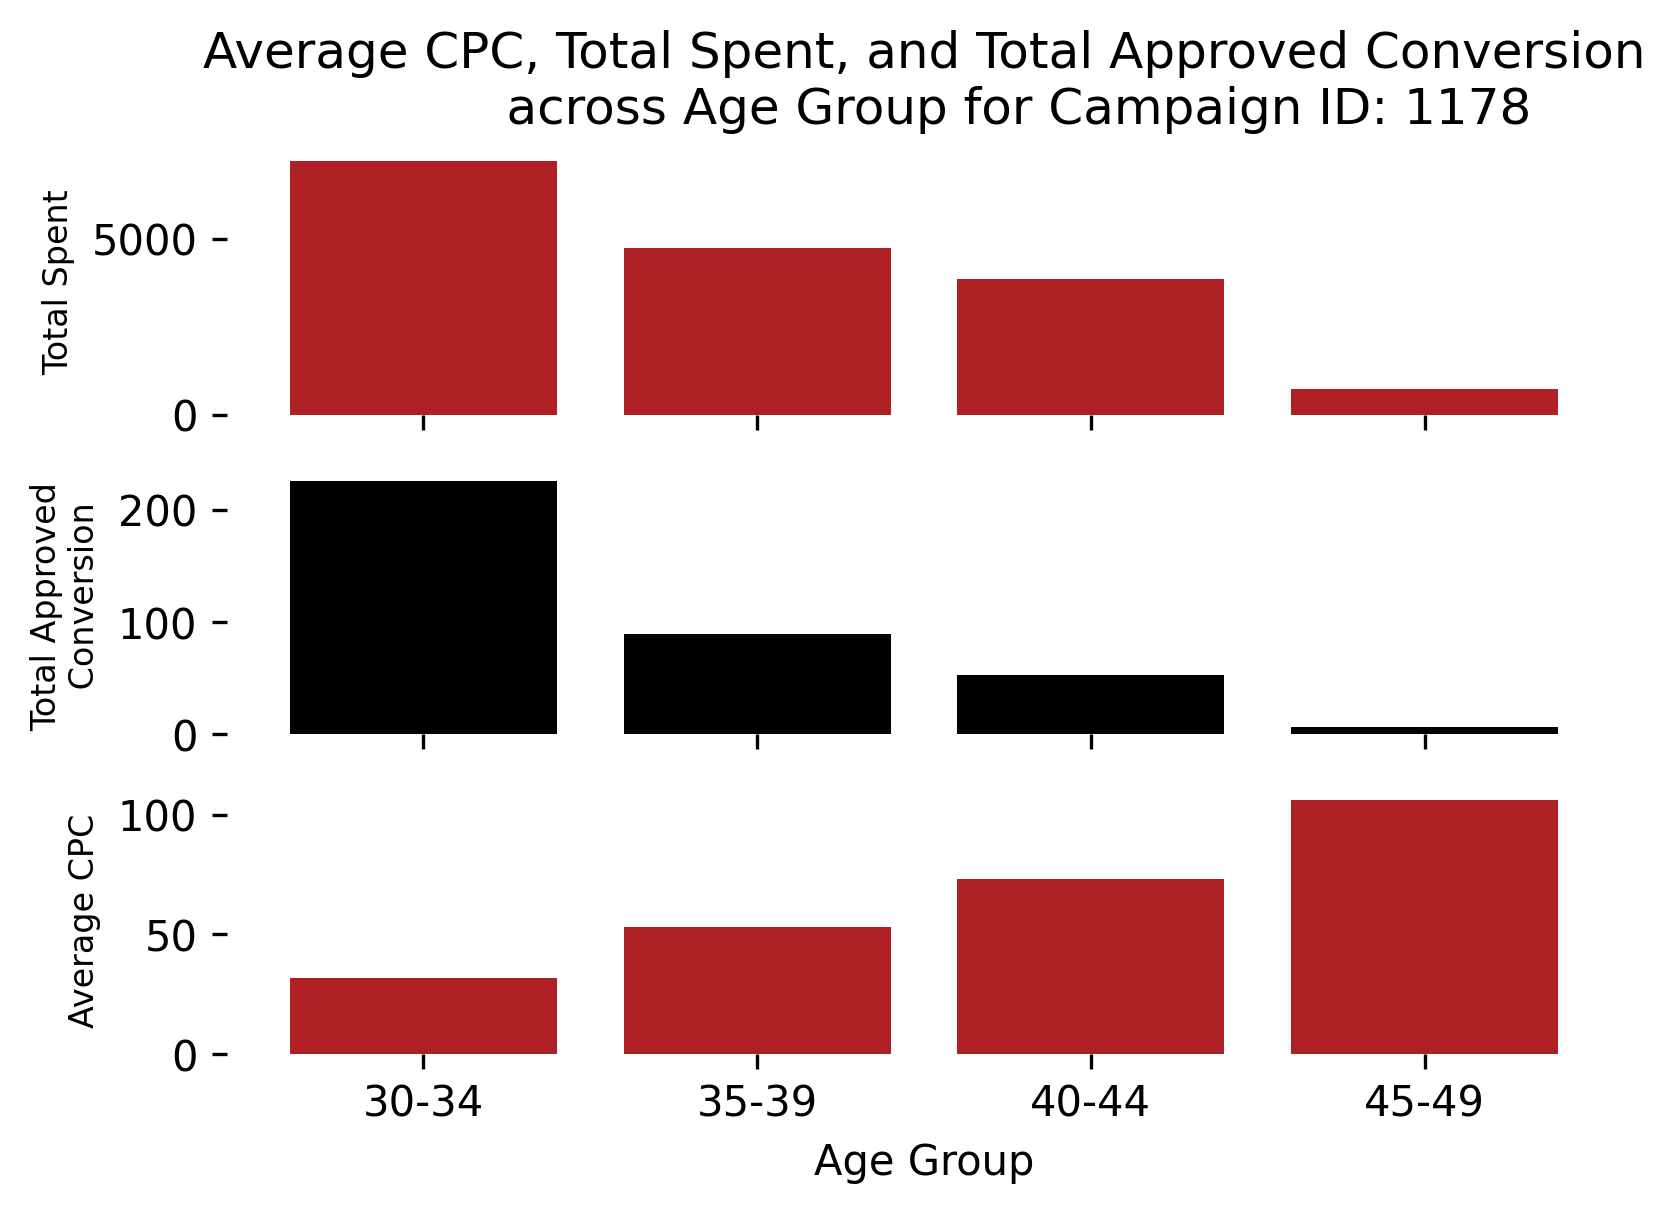

In [18]:
bot.polling()

In [19]:
bot.set_webhook()

True